<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>
# <center>Density-Based Clustering</center>

La mayoría de las técnicas tradicionales de clustering, tales como k-Means,jerárquicas, y el fuzzy clustering, se pueden utilizar para agrupar datos de una forma no supervisada. 

Sin embargo, cuando se aplica a tareas con clusteres de forma arbitraria,o clusteres dentro de clusteres, las técnicas tradicionales podrían no ser capaces de lograr buenos resultados. Es decir, los elementos en el mismo cluster pueden no compartir suficiente similitud -- o el rendimiento puede ser pobre.
Además, el Clustering basado en densidad ubica regiones de alta densidad que se separan una de otra por regiones de baja densidad. Densidad, en este contexto, se define como el número de puntos dentro de un radio específico.



En esta sección, el principal foco será manipular los datos y las propiedades del DBSCAN y observar el clustering resultante.

Importar las siguientes librerías:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Recuerda <b> %matplotlib inline </b> para mostrar el gráfico

In [ ]:
# Nota: Para la visualización del mapa, se necesita un paquete basado en mapas.
# si no tienes instalado el paquete anterior en tu máquina, puedes utilizar la siguiente linea para instalarlo
# !conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Nota: podrías tener que actualizar tu página para volver a ejecutar el lab luego de la instalación

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
!conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - basemap==1.1.0

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




### Generación de datos
La siguiente función genera los puntos de datos y necesita estas entradas:
<ul>
    <li> <b>centroidLocation</b>: Coordina los centroides que generarán los datos aleatorios. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: El número de datos que queremos generar, dividir sobre los centroides (# de centroides definidos en centroidLocation) </li>
    <ul> <li> Ejemplo: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: La desviación standard entre clusters. Mientras más grande el número, más lejos la distancia. </li>
    <ul> <li> Ejemplo: 0.5 </li> </ul>
</ul>

In [4]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Crear datos aleatorios y almacenar en la matriz X y el vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Estandarizar características eliminando el promedio y la unidad de escala
    X = StandardScaler().fit_transform(X)
    return X, y

Usar <b>createDataPoints</b> con <b>3 datos de entrada</b> y guardar la salida en variable <b>X</b> e <b>y</b>.

In [5]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modelado
DBSCAN significa Density-based Spatial Clustering of Applications with Noise (Clustering espacial basado en densidad de aplicaciones con ruido). Esta técnica es una de las más comunes de algoritmos de clustering, que funciona en base a la densidad del objeto.
DBSCAN trabaja en la idea de que si un punto en particular pertenece a un cluster, debería estar cerca de un montón de otros puntos en ese cluster.

Funciona en base a 2 parámetros: Radius (Radio) y Puntos Mínimos.  
__Epsilon__ determina un radio especificado que, si incluye suficientes puntos dentro de él, lo llamamos de "área densa".
__minimumSamples__ determina el número mínimo de puntos de datos que queremos en un neighborhood (vecindario) para definir un cluster.



In [6]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 1, 0])

### Distinguir Valores Atípicos
Reemplacemos todos los elementos con 'True' en core_samples_mask que estan en el cluster, 'False' si los puntos son valores atípicos (outliers).

In [7]:
# Primer, crear un vector de valores booleanos (valores binarios (verdadero/falso)) usando las etiquetas de la variable db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
# Número de clusters en etiquetas, ignorando el ruido en caso de estar presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [9]:
# Eliminar la repetición en las etiquetas transformándolas en un conjunto.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Visualización de Datos

In [10]:
# Crear colores para los clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

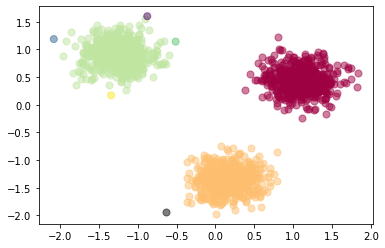

In [11]:
# Dibujar los puntos con colores
for k, col in zip(unique_labels, colors):
    if k == -1:
        # El color negro se utilizará para señalar ruido en los datos.
        col = 'k'

    class_member_mask = (labels == k)

    # Dibujoar los datos que estan agrupados (clusterizados)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Dibujar los valores atípicos
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

## Práctica
Para entender mejor las diferencias entre el clustering basado en densidad y el basado en partición, intentaremos agrupar el conjunto de datos anterior en 3 clusters usando k-Medias.
Nota: no generar datos de nuevo, utilizaremos el mismo del punto anterior.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


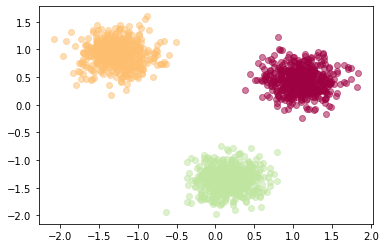

In [12]:
# escribir código aquí

from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()


Hacer doble click __aquí__ para la solución.

<!-- Tu respuesta debajo:


from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()


-->




<h1 align=center> Weather Station Clustering usando DBSCAN & scikit-learn </h1>
<hr>

DBSCAN es especialmente eficaz para tareas como la identificación de clases en un contexto espacial. El atributo maravilloso del algoritmo DBSCAN es que puede encontrar cualquier forma arbitraria de cluster sin verse afectado por el ruido. Por ejemplo, este mapa muestra la ubicación de las estaciones meteorológicas en Canadá.
<Click 1>
DBSCAN puede ser usado aquí para encontrar el grupo de estaciones, que muestran las mismas condiciones climáticas. Como puede ver,no sólo encuentra diferentes clusteres en forma arbitraria, sino que puede encontrar la parte más densa de las muestras centradas en datos ignorando áreas menos densas o ruidos.

comencemos jugando con los datos. Estaremos trabajando en función de la siguiente secuencia: </font>
1. Cargar datos
- Revisar datos
- Limpiar datos
- Seleccionar datos
- Clustering

### Acerca del set de datos

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

### 1-Descargar los datos
Para descargar los datos, utilizaremos **`!wget`** de IBM Object Storage.  
__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Registrate ahora gratuitamente] (http://cocl.us/ML0101EN-IBM-Offer-CC)

In [13]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2021-03-17 16:23:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.08s   

2021-03-17 16:23:51 (1.65 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



### 2- Cargar el set de datos
Importaremos el .csv, luego crearemos las columnas para el año, mes y el dia.

In [14]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 3-Limpieza
Saquemos las filas que no tienen valor en el campo __Tm__.

In [15]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### 4-Visualización
Visualización de estaciones usando el package basemap. El toolkit basemap matplotlib es una librería para dibujo de mapas en 2D en Python. Basemap no dibuja por sí mismo, sino que facilita la transformación de las coordenadas a proyecciones de mapas. 

Favor notar que el tamaño de cada punto de datos representa el promedio máximo de temperatura para cada estación del año. 

In [25]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



ImportError: cannot import name 'dedent'

SyntaxError: invalid syntax (<ipython-input-23-c95ff65de329>, line 2)

### 5- Clustering de las estaciones basado en su ubicación i.e. Lat & Lon

__DBSCAN__ (parte de la librería sklearn) ejecuta el clustering desde un vector o una matriz de distancia. En nuestro caso, pasamos el arregloNumpy array Clus_dataSet para encontrar ejemplos de alta densidad y expandir clusters a partir de ellos. 

In [18]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Calcular con DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# Muestra de clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

KeyError: "None of [Index(['xm', 'ym'], dtype='object')] are in the [columns]"

Como puedes ver con los valores atípicos, la etiqueta del clustere es -1

In [ ]:
set(labels)

### 6- Visualización de clusters basados en ubicación
Ahora, podemos visualizar los clusters usando basemap:

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Para crear un mapa de colores
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualización
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

ImportError: cannot import name 'dedent'

### 7- Clustering de estaciones basado en su ubicacion, temperatura promedio, máxima y mínima
En esta sección, volvemos a ejecutar DBSCAN, pero esta vez, en un dataset de 5-dimensiones:

In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Computar DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# Una muestra de clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

KeyError: "['ym', 'xm'] not in index"

### 8- Visualización de clusters basados en ubicación y temperatura


In [27]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Para crear un mapa de color
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualización1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

ImportError: cannot import name 'dedent'

## Want to learn more?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección! 

Notebook creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este lab y su código fuente fueron registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​